Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [17]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import plotly.express as px

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import word2number Library
from word2number import w2n

In [3]:
# Load the Automobile Dataset and Check Column Content
auto_df = pd.read_csv('automobile.txt')
auto_df.head()
#auto_df.columns
#unique_col_values = {col: auto_df[col].value_counts() for col in auto_df.columns}
#print(unique_col_values)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. 

In [5]:
# Code here
# Please see columns dropped below

#### Remove any duplicate rows

In [4]:
# Code here
# Count Number of Duplicate Rows
row_duplicates = auto_df.duplicated().sum()
print("\nThere are {} duplicate rows.\n".format(row_duplicates))

# There are no duplicate rows in this dataset.


There are 0 duplicate rows.



#### Remove rows with missing data 

Some entries have question marks as opposed to NaN, highlighting missing data that was not captured at the time of the study.

In [5]:
# Code here
# Check Missing Rows
# missing_data = auto_df.isnull().sum()
# print(missing_data)

# No missing data in the form of NaN but there are '?' values
# Replace '?' entries with NaN
auto_df.replace('?', pd.NA, inplace=True)
missing_data = auto_df.isnull().sum()
print(missing_data)

# Drop normalized-losses and symboling columns - not particularly useful
# and normalized losses has 41 missing values
auto_df.drop('normalized-losses', inplace=True, axis=1)
auto_df.drop('symboling', inplace=True, axis=1)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [6]:
# Drop rows with missing data as without car model name
# These missing values cannot be replaced/predicted.
auto_df = auto_df.copy()
auto_df = auto_df.dropna()
missing_data = auto_df.isnull().sum()
print(missing_data)

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


All rows with any missing values have been removed from the dataframe.

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Numerical fields that are currently 'o' or object types should be converted to their float/integer counterparts and columns containing string representations of numbers must be converted to integer types.

In [7]:
# Check Data Types
# auto_df.dtypes
# unique_col_values = {col: auto_df[col].value_counts() for col in auto_df.columns}
# print(unique_col_values)

# Convert num-of-doors column to numerical/integer value
#auto_df['num-of-doors'] = auto_df['num-of-doors'].apply(w2n.word_to_num)

# Convert num-of-cylinders to numerical/integer value
# auto_df['num-of-cylinders'] = auto_df['num-of-cylinders'].apply(w2n.word_to_num)

# Convert bore and stroke columns to float values
auto_df['bore'] = auto_df['bore'].astype(np.float64)
auto_df['stroke'] = auto_df['stroke'].astype(np.float64)

# Convert horsepower, peak-rpm and price columns to integer values
auto_df['horsepower'] = auto_df['horsepower'].astype(np.int64)
auto_df['peak-rpm'] = auto_df['peak-rpm'].astype(np.int64)
auto_df['price'] = auto_df['price'].astype(np.int64)

auto_df.dtypes


make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their performance in terms of horsepower rating.

In [8]:
# Code here
# Sort for the 5 most expensive cars
auto_df.sort_values(by='price', ascending=False).head()

# Sort for the 5 most inexpensive cars
auto_df.sort_values(by='price', ascending=True).head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
50,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
150,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
76,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389


The 5 most expensive cars on the list are all German-based OEMs such as Mercedes-Benz, BMW and Porsche and all have horsepower ratings exceeding 182bhp.

The 5 cheapest cars on the list are a mix of Japanese and USA-based OEMS such as Subaru, Chevrolet, Mazda, Toyota and Mitsubishi and all have horsepower ratings below 70 bhp.

#### What are the top 5 most fuel efficient cars? 

Compare the city and highway-based mpg figures. The comparison helps us identify the most fuel efficient vehicles over a combined cycle. 

As per https://www.fueleconomy.gov/feg/label/learn-more-gasoline-label.shtml#:~:text=Combined%20fuel%20economy%20is%20a,the%20Highway%20value%20by%2045%25, the combined fuel consumption figure is obtained by taking the average of city and highway values and weighting the two by 55% and 45% respectively. 

In [9]:
# Code here
auto_df['combined-mpg'] = auto_df['city-mpg']*0.55 + auto_df['highway-mpg']*0.45
auto_df.sort_values(by='combined-mpg', ascending=False).head()



,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,combined-mpg
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,1bbl,2.91,3.41,9.6,58,4800,49,54,6479,51.25
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,2bbl,2.91,3.03,9.5,48,5100,47,53,5151,49.70
90,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,idi,2.99,3.47,21.9,55,4800,45,50,7099,47.25
160,toyota,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,...,2bbl,3.19,3.03,9.0,70,4800,38,47,7738,42.05
159,toyota,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,idi,3.27,3.35,22.5,56,4500,38,47,7788,42.05


The 5 most fuel-efficient vehicles are a combination of Japanese and USA-based OEMs in the form of Honda, Chevrolet, Nissan and Toyota.
These vehicles have combined fuel consumption figures in excess of 42mpg.

#### Find the longest vehicles
Sort the dataframe based on the length column.

In [10]:
# Code here
auto_df.sort_values(by='length', ascending=False).head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,combined-mpg
73,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960,14.90
71,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184,16.90
70,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600,23.35
48,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550,16.80
47,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250,16.80


The 5 longest vehicles in this dataset are in excess of 199 inches in length. 

#### Find 7 Cars with Peak RPM Equal to and Exceeding 6000 rpm

In [11]:
# Code here
auto_df[auto_df['peak-rpm']>=6000].head(7)



,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,combined-mpg
31,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,1bbl,2.91,3.41,9.2,76,6000,31,38,6855,34.15
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,1bbl,2.91,3.41,9.2,76,6000,30,34,6529,31.80
34,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,1bbl,2.91,3.41,9.2,76,6000,30,34,7129,31.80
35,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,1bbl,2.91,3.41,9.2,76,6000,30,34,7295,31.80
36,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,1bbl,2.92,3.41,9.2,76,6000,30,34,7295,31.80
165,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,...,mpfi,3.24,3.08,9.4,112,6600,26,29,9298,27.35
166,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,...,mpfi,3.24,3.08,9.4,112,6600,26,29,9538,27.35


7 examples of vehicles with peak rpm values greater than and including 6000rpm are all Japanese OEMs in the form of Toyota and Honda.

#### Most Common Engine Types genres 
Create a bar plot explaining the frequency of engine in each genre.

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

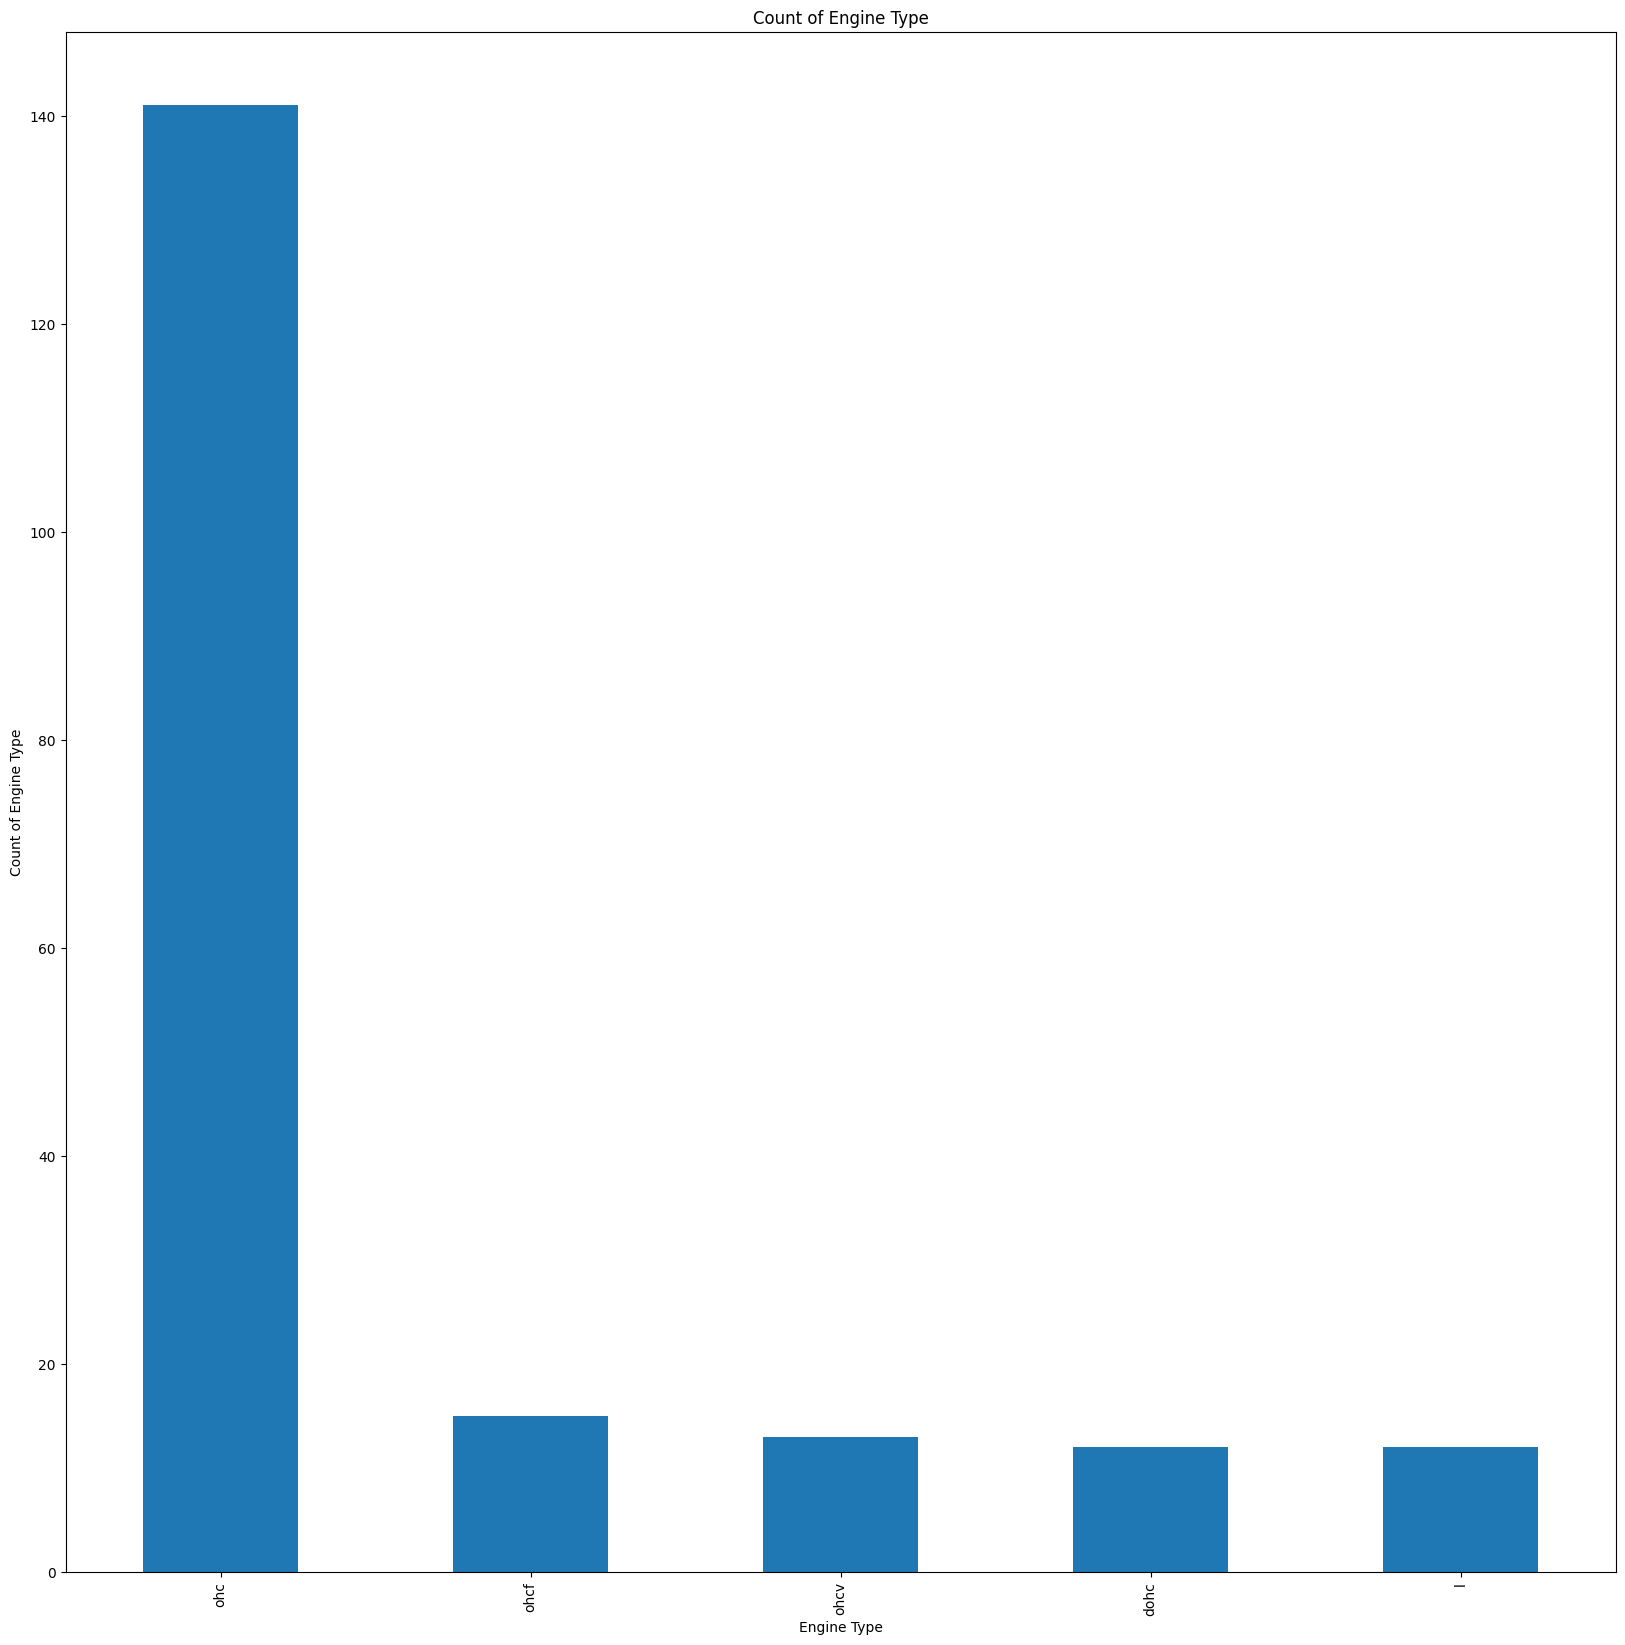

In [12]:
# Code here
# Create Engine-Type Dataframe
engine_type = auto_df['engine-type'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(20,20))
engine_type.plot(kind='bar')
plt.xlabel('Engine Type')
plt.ylabel('Count of Engine Type')
plt.title('Count of Engine Type')
plt.legend

The most common engine type in this dataset is the 'OHC' or Single Overhead Camshaft, followed by 'OHCF' or Overhead Camshaft with Four Valves Per Cylinder, 'OHCV' or Overhead Camshaft with Variable Valve Timing, 'DOHC' or Dual Overhead Camshafts and finally 'l' or flat type engines. 

Text(0, 0.5, 'Average Horsepower Rating')

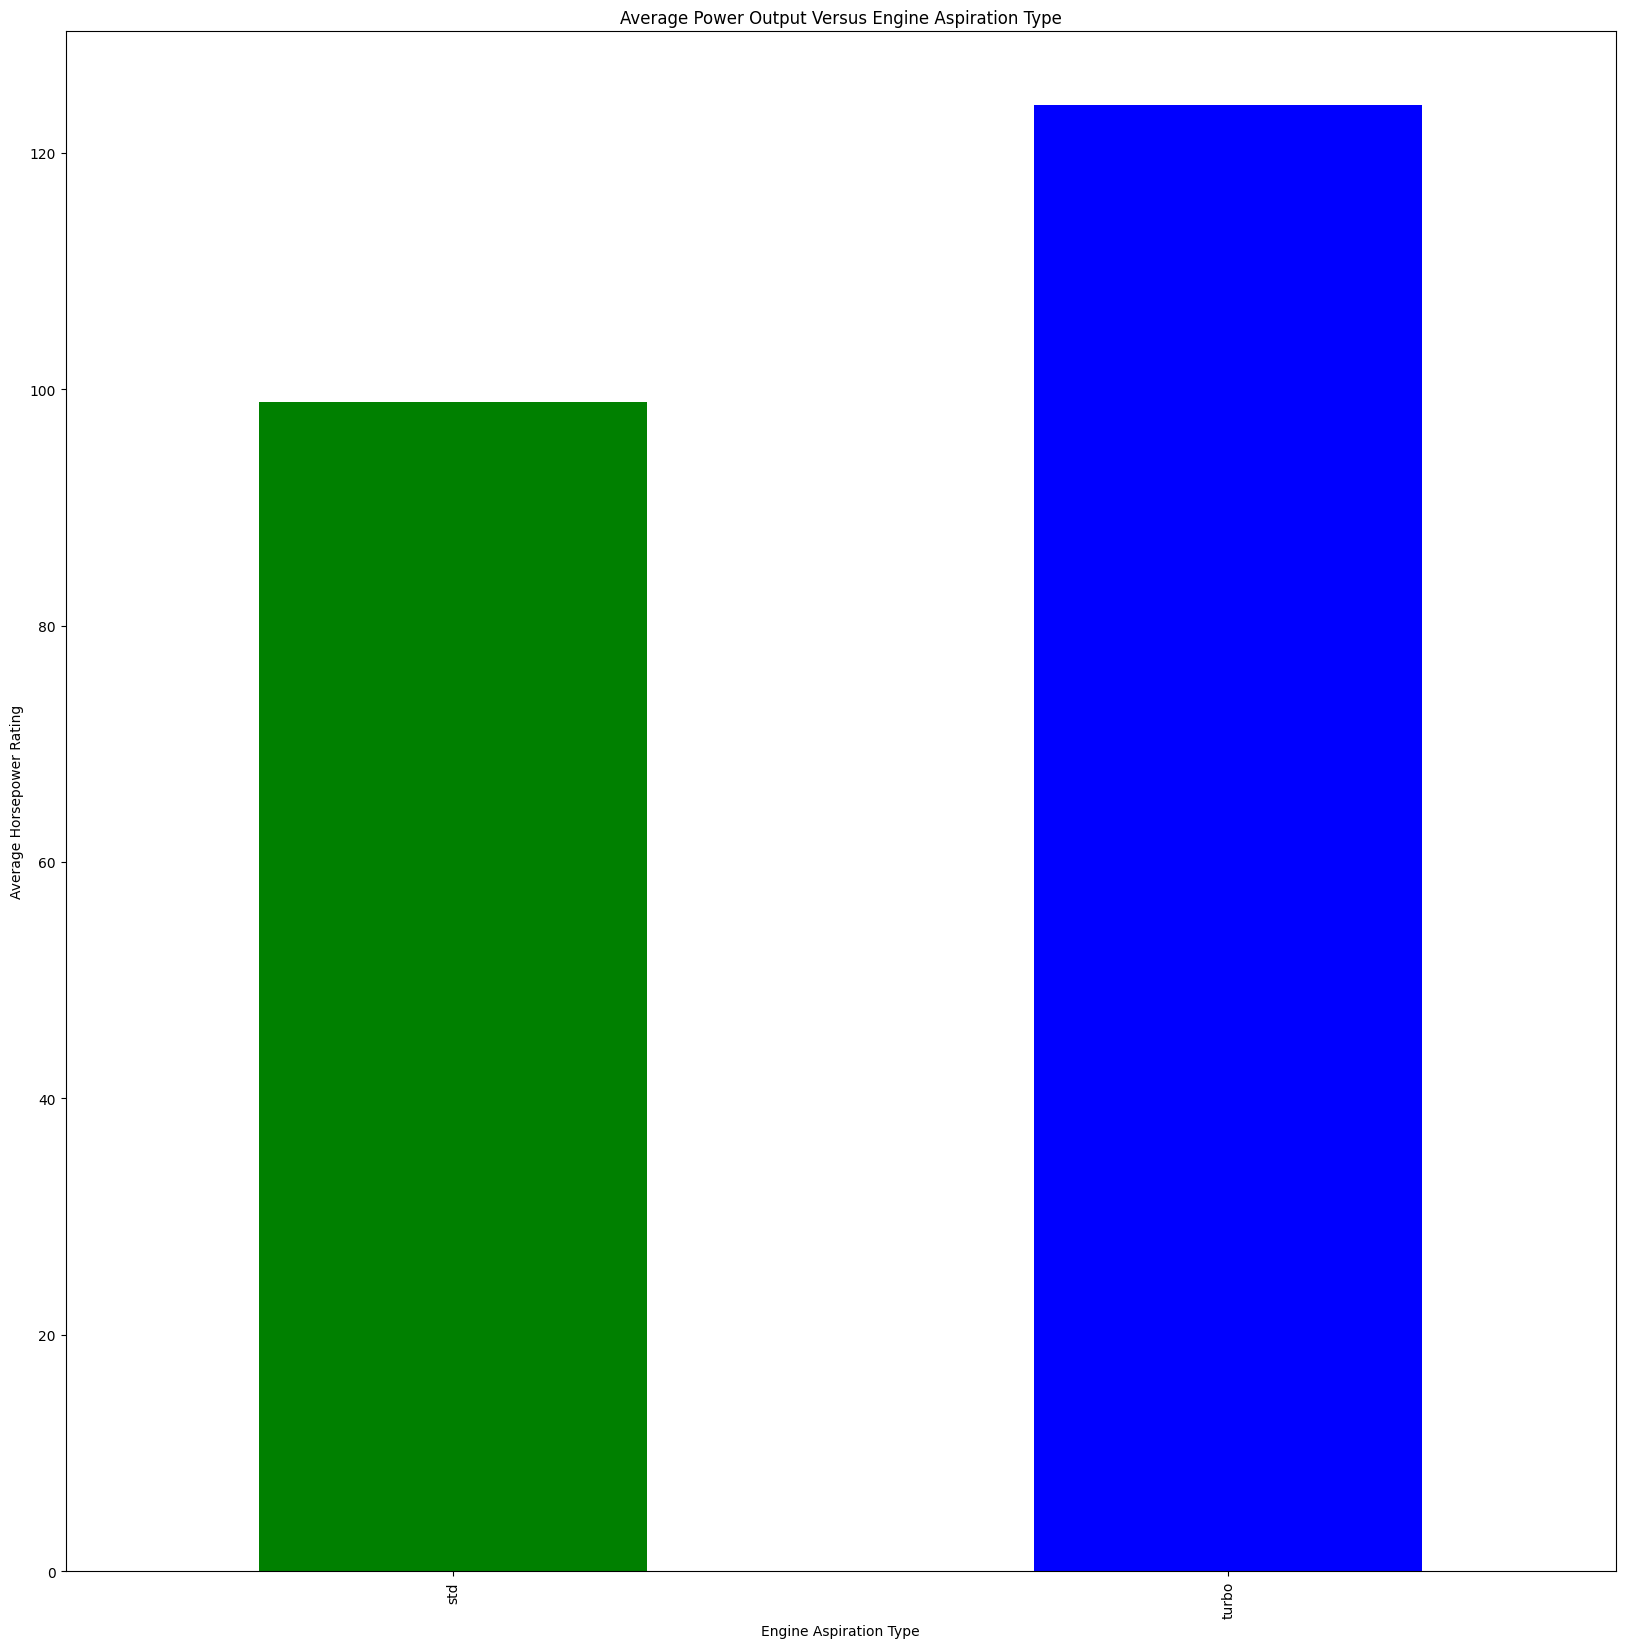

In [13]:
# Generate three different interesting visualisations with a data story.

# Average Power Output Versus Aspiration Type Dataframe Creation
avgpower_versus_aspiration = auto_df.groupby('aspiration')['horsepower'].mean()

# Plot Bar Charts
plt.figure(figsize=(20,20))
avgpower_versus_aspiration.plot(kind='bar', color=['green', 'blue'])
plt.title('Average Power Output Versus Engine Aspiration Type')
plt.xlabel('Engine Aspiration Type')
plt.ylabel('Average Horsepower Rating')


As expected, the average horsepower rating of forced induction/turbo engines exceeds the average for standard/naturally aspirated types.

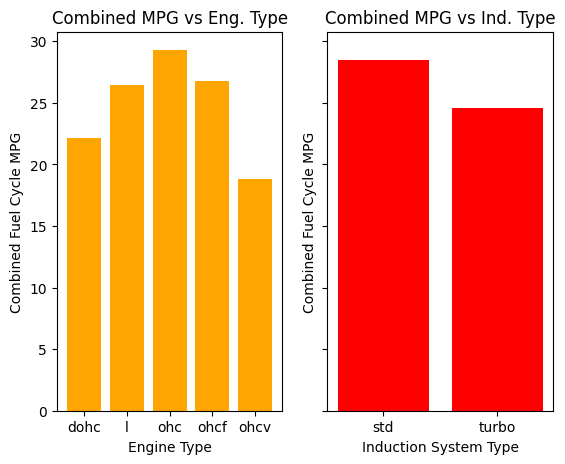

In [14]:
# Combined Fuel Cycle versus Engine Type Dataframe Creation
comfc_versus_engtype = auto_df.groupby('engine-type')['combined-mpg'].mean()

# Combined Fuel Cycle versus Aspiration Type Dataframe Creation
comfc_versus_asptype = auto_df.groupby('aspiration')['combined-mpg'].mean()

# Plot Bar Charts
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(comfc_versus_engtype.index, comfc_versus_engtype.values, color = 'orange')
ax1.set_title('Combined MPG vs Eng. Type')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Combined Fuel Cycle MPG')

ax2.bar(comfc_versus_asptype.index, comfc_versus_asptype.values, color = 'red')
ax2.set_title('Combined MPG vs Ind. Type')
ax2.set_xlabel('Induction System Type')
ax2.set_ylabel('Combined Fuel Cycle MPG')
plt.subplots_adjust(top=0.9)

Based on the above bar charts in the form of Figure 2, the most fuel-efficient vehicles are those with overhead camshaft-type engine setups 'OHC' with standard/naturally aspirated induction systems.  
* While turbo-charged engines are usually considered to be more fuel efficient, as they recuperate energy from the hot exhaust gasses that would otherwise be discharged out of the exhaust system, the above plot summarising the dataset states otherwise. This is most likely since the turbo-charged vehicles in this dataset are more sports/performance oriented. In this case, the turbocharger is serving the main purpose of compressing the air-fuel mixture in the combustion chamber to a higher degree than its naturally aspirated counterparts to maximise horsepower output. This is suggested by Figure 3 below, which summarises the horsepower variation with induction system type. 
* While there are a few outliers on the naturally aspirated vehicles in the dataset, the median horsepower of forced-induction systems does exceeds that of naturally-aspirated vehicles in this dataset and hence a bias towards performance over fuel efficiency. This is also suggested by the fewer data points of turbocharged vehicles in a naturally aspirated vehicle prominent dataset. 
* OHC or Overhead Cam engines are generally more fuel efficient than other types of engines such as other inline (I) engines with older pushrod-style valve actuation due to the reduction in overall system components and subsequently system mass. This means that less power is required to get the engine components up to a certain speed due to inertial resistance and hence reduced fuel consumption overall. 


In [19]:
# Box Plot for Above
fig = px.box(auto_df, x='aspiration', y='horsepower', color='aspiration', points='all')
fig.show()

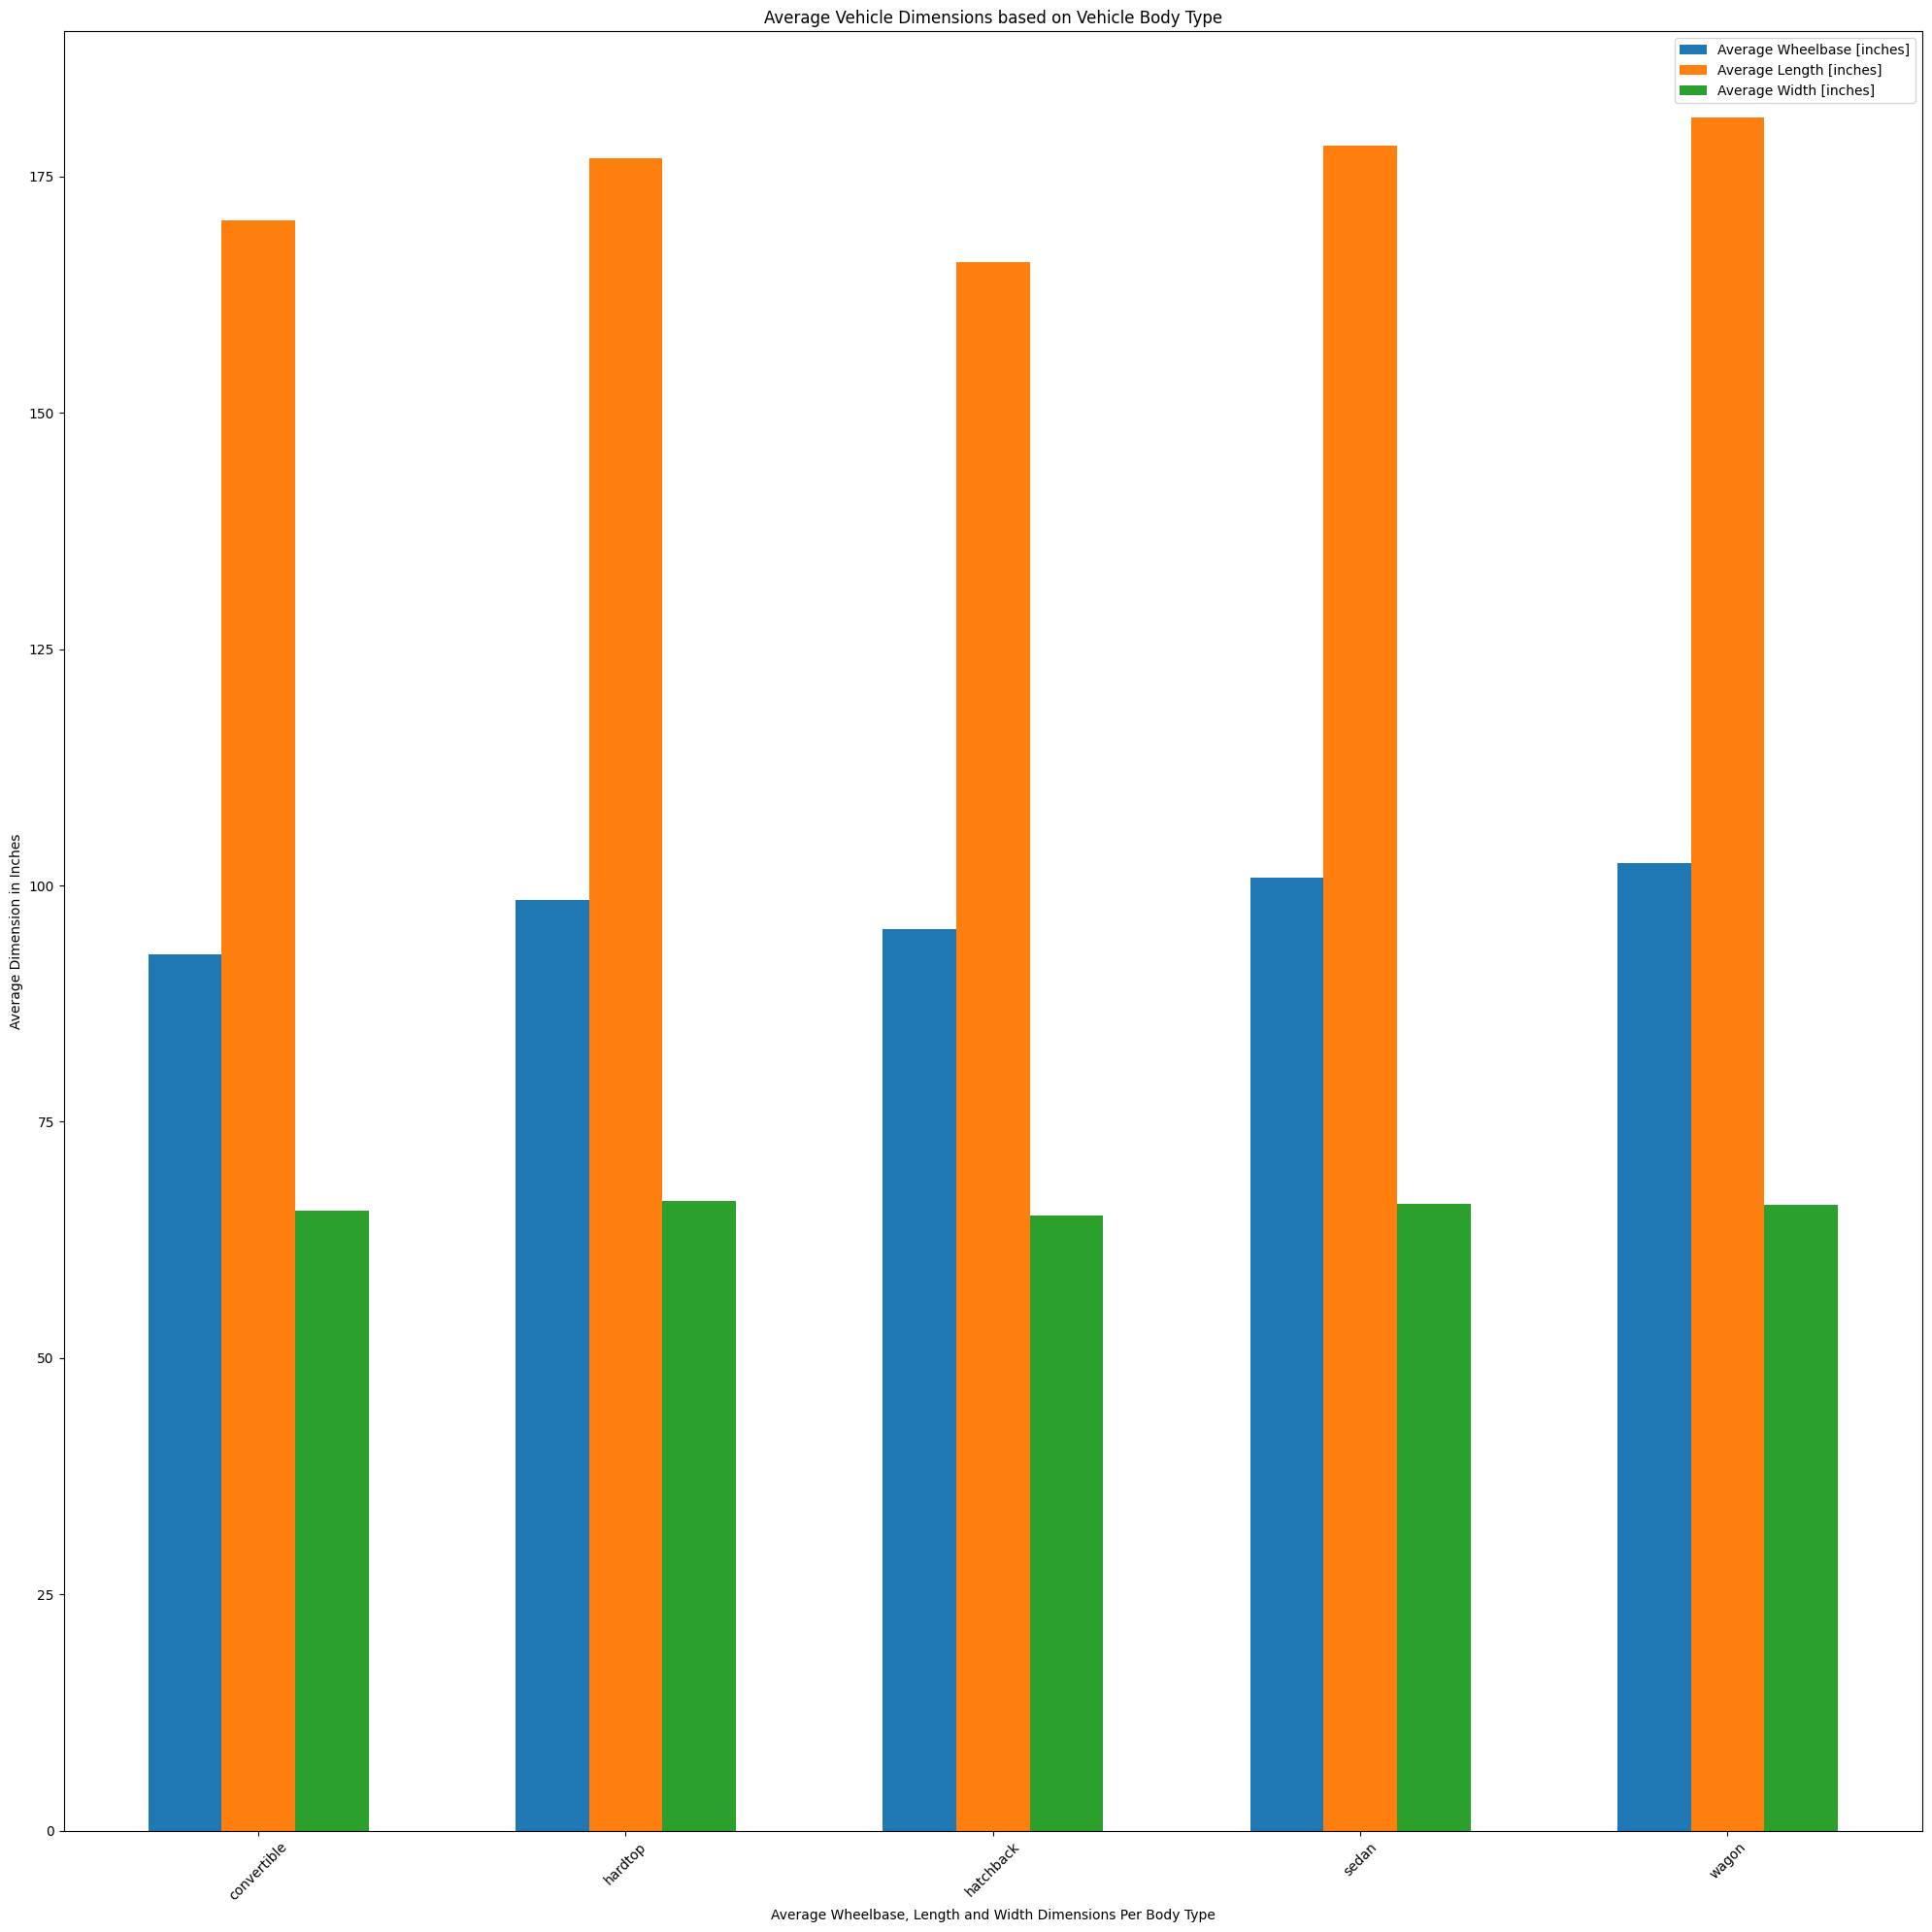

In [15]:
# Average Dimensions versus Vehicle Body Type
average_body_size = auto_df.groupby('body-style')[['wheel-base', 'length', 'width']].mean()

# Plot Bar Chart
fix,ax = plt.subplots(figsize=(20,20))
bar_widths = 0.2
index_xaxis=np.arange(len(average_body_size))

bar_plot1 = plt.bar(index_xaxis, average_body_size['wheel-base'], bar_widths, label='Average Wheelbase [inches]')
bar_plot2 = plt.bar(index_xaxis + bar_widths, average_body_size['length'], bar_widths, label='Average Length [inches]')
bar_plot3 = plt.bar(index_xaxis + bar_widths*2, average_body_size['width'], bar_widths, label='Average Width [inches]')
plt.xlabel('Average Wheelbase, Length and Width Dimensions Per Body Type')
plt.ylabel('Average Dimension in Inches')
plt.title('Average Vehicle Dimensions based on Vehicle Body Type')
plt.xticks(index_xaxis + bar_widths, average_body_size.index, rotation=45)
plt.legend()
plt.tight_layout()

As per the above bar charts depicting the average dimensions (wheelbase, length, and width) of vehicles based on their body style, sedans and station wagons have the largest average wheelbase, station wagons, sedans and hardtops have the largest average vehicle lengths and hardtops on average have the largest average widths.

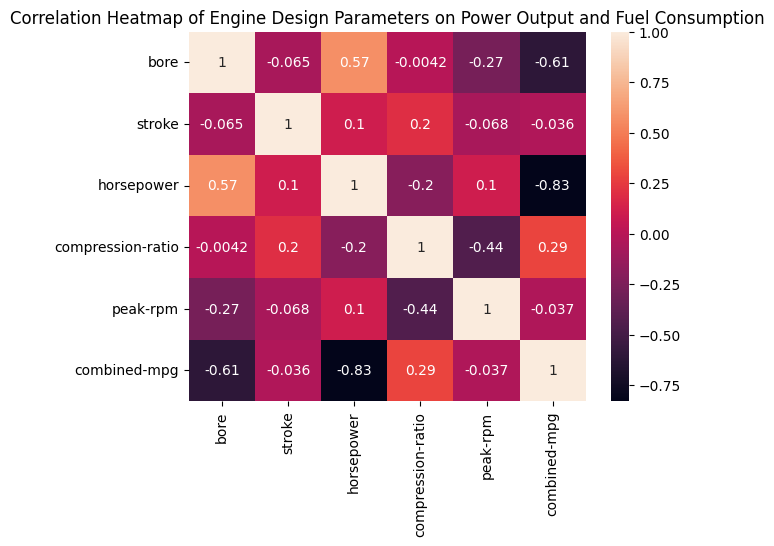

In [16]:
# Correlation Heatmap for Numerical Variables

# Selection of columns of interest
auto_nums = auto_df[['bore', 'stroke', 'horsepower', 'compression-ratio', 'peak-rpm', 'combined-mpg']]

# Correlation Heatmap Matrix Plot
plt.figure()
corr_mat_auto = auto_nums.corr()
sns.heatmap(corr_mat_auto, annot=True)
plt.title('Correlation Heatmap of Engine Design Parameters on Power Output and Fuel Consumption')
plt.show()
plt.close()

From the above correlation heatmap, there are a number of interesting observations that can be deduced.
* Cylinder Bore or diameter has a moderate negative correlation as expected, as the larger cylinder diameter and corresponding larger piston requires larger injectors and hence additional fuel required in order to achieve the desired work output with larger combined inertial masses to overcome. 
* Horsepower and combined-mpg are strongly negatively correlated as expected, as higher performing engines consume additional fuel and are designed with a bias of performance over efficiency, with higher operating limits and larger injectors to deliver faster and larger volumes of fuel - faster fuel flow rates.
* There is a negative correlation between compression ratio and peak-rpm as expected. Compression ratio relates to the volume ratio within the cylinder at Top Dead Centre (TDC) versus Bottom Dead Centre (BDC), corresponding to the smallest and largest cycle volumes respectively. A higher compression ratio corresponds to a larger volume that is diplaced by the movement of the piston and subsequently results in both a higher pressure and temperature of the fuel-air mixture as these contents of certain volume are compressed to a higher degree. This places immense stress on the engine internals and thus to safeguard the engine, a lower peak design rpm would be required to keep these stresses within material limitations.
* There is a positive correlation between compression raito and combined-mpg as generally, the higher operating temperatures and pressures of a higher compression ratio engine results in optimised combustion of the fuel-air mixture and thus improves fuel consumption. This does not translate to additional horsepower as observed by the weak negative correlation of compression ratio with horsepower and this may be subject to limitations such as higher heat transfer to engine components, reducing usable energy to displace the piston, as well as higher pressures risking early combustion while the piston is still advancing to Top Dead Centre, which can increase stress on the engine components and promote accelerated wear. 

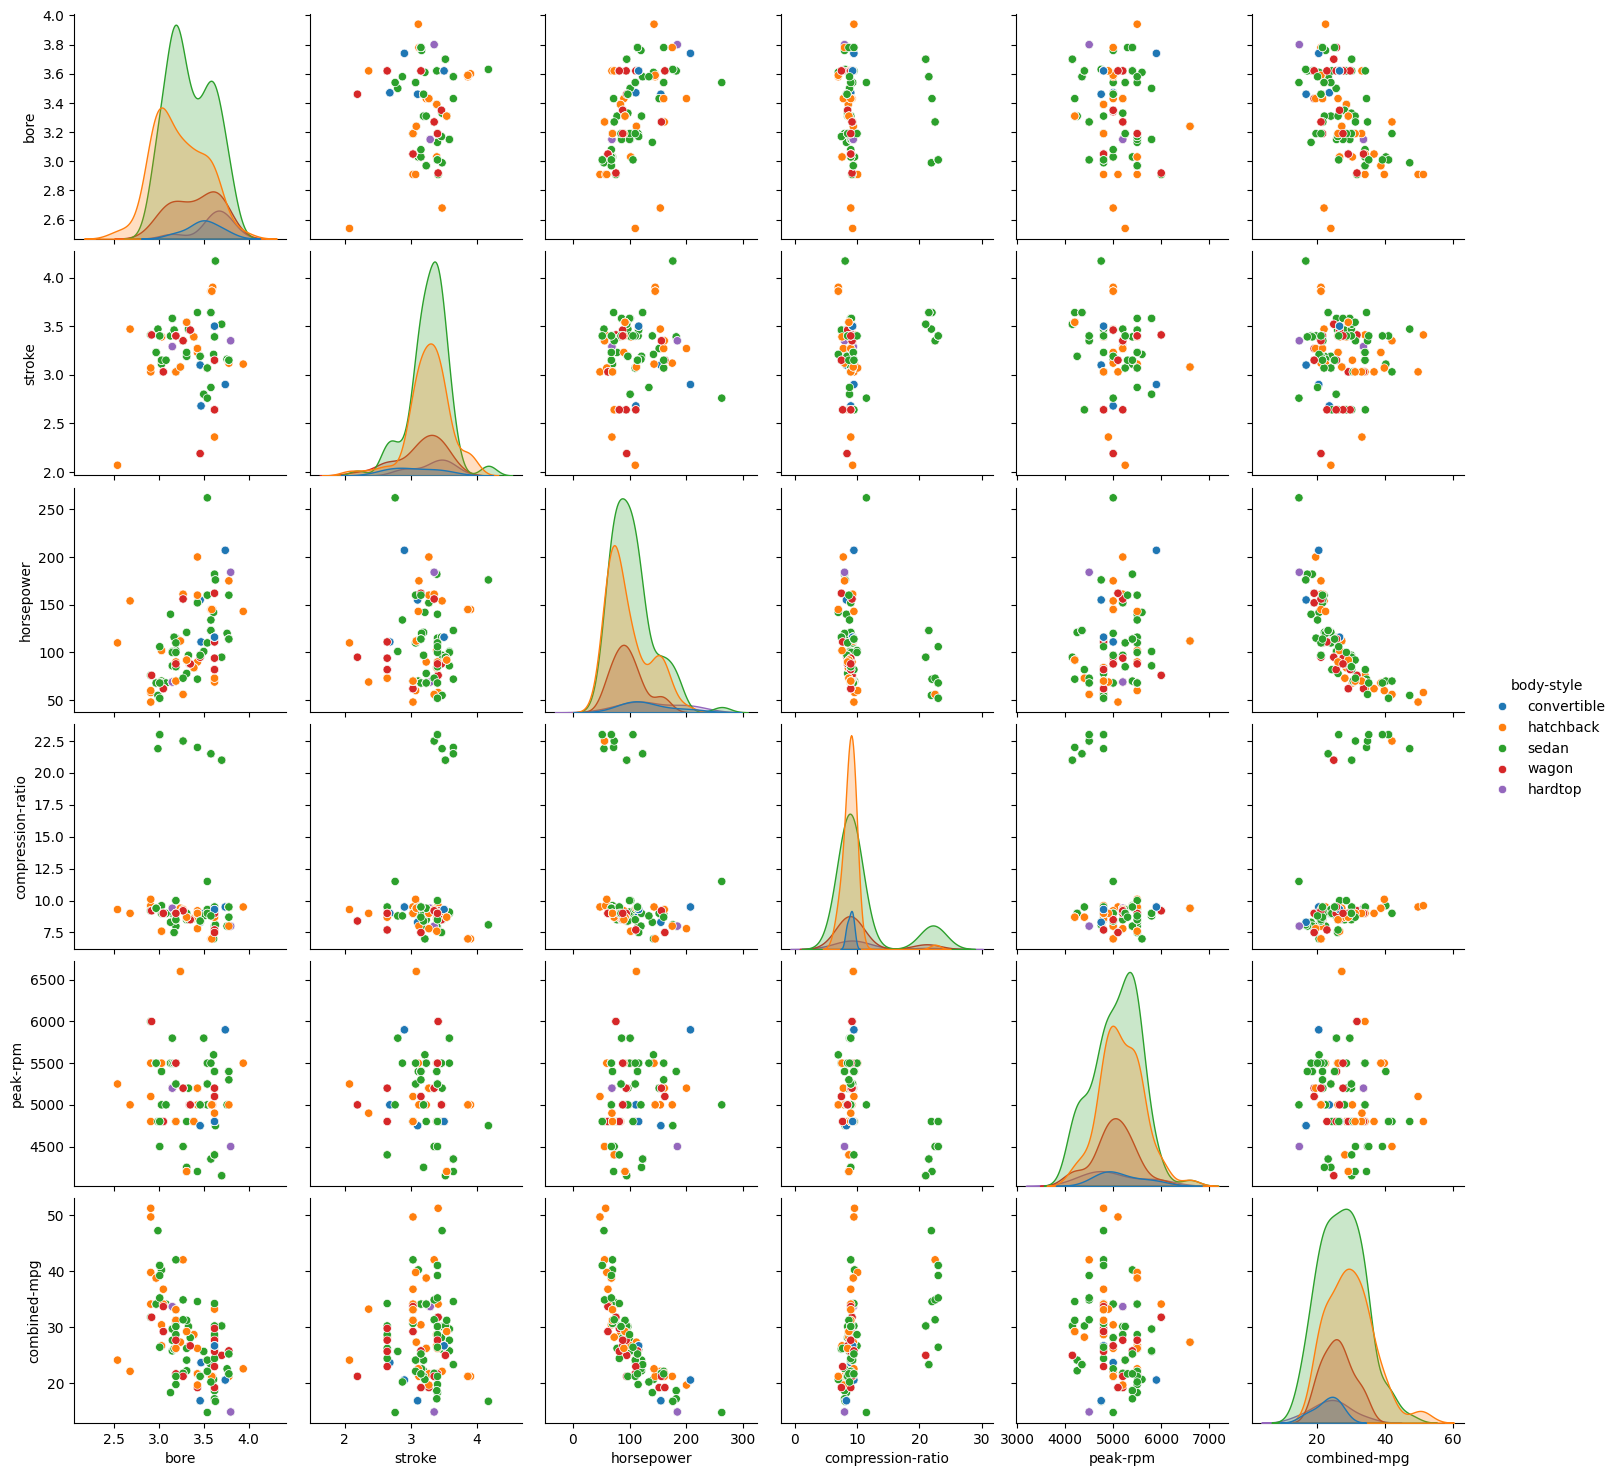

In [20]:
# Pair Plot for Above Numerical Data
sns.pairplot(data=auto_df, x_vars=['bore', 'stroke', 'horsepower', 'compression-ratio', 'peak-rpm', 'combined-mpg'], y_vars=['bore', 'stroke', 'horsepower', 'compression-ratio', 'peak-rpm', 'combined-mpg'], hue='body-style')


A number of insights can be derived from the above pair plot as follows:
* A strong negative correlation can be derived from inspection of the combined-mpg and horsepower scatter plot, with increased power output leading to reduced fuel efficiency which aligns to the correlation heat map. Sedans and hatchbacks have significant overlap on the kde plots, with hatchback body type vehicles in this dataset having the highest combined mpg. 
* A positive correlation can be derived between horsepower and bore, most notably on sedan body type vehicles, with sedans having the highest power output as shown on the horsepower kde. This again ties up to the correlation heatmap, with a larger piston surface and combustion chamber planar area promoting more work being done over the piston's diplacement. 
* What is also interesting to note is the variation in compression-ratio with body style as noted by the compression ratio kde, with two distinct groups below 10 and above 20. The higher compression ratios relate to diesel or compression ignition engines, relying on temperature and pressure to ignite the fuel-air mixture alone, without a spark plug as present in petrol engines. This is confirmed by the prevelance of diesel sendans (14) compared to any other body type and relates to the second data peak above a compression ratio of 20. 

In [26]:
# Diesel and Petrol Fuel Types with Body Type
fuel_types = auto_df.groupby(['fuel-type','body-style']).size()
print(fuel_types)

fuel-type  body-style 
diesel     hardtop         1
           hatchback       1
           sedan          14
           wagon           3
gas        convertible     6
           hardtop         7
           hatchback      62
           sedan          78
           wagon          21
dtype: int64
